In [ ]:
"""
Second customized sequential model
Use fashion mnist data arXiv:1708.07747, August 2017.
"""

import tensorflow as tf
from customizelayer_utils.main_model_frame import (
    MainModel,
    find_loss_gradients,
    train_model
)
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

@article{DBLP:journals/corr/abs-1708-07747,
  author    = {Han Xiao and
               Kashif Rasul and
               Roland Vollgraf},
  title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
               Algorithms},
  journal   = {CoRR},
  volume    = {abs/1708.07747},
  year      = {2017},
  url       = {http://arxiv.org/abs/1708.07747},
  archivePrefix = {arXiv},
  eprint    = {1708.07747},
  timestamp = {Mon, 13 Aug 2018 16:47:27 +0200},
  biburl    = {https://dblp.org/rec/bib/journals/corr/abs-1708-07747},
  bibsource = {dblp computer science bibliography, https://dblp.org}
}


In [2]:


# load in train /test image
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# make sure type is expected for tensorflow
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)



In [3]:
# let's train on first 5000
train_images = train_images[:5000] / 255.0
train_labels = train_labels[:5000]

test_images = test_images / 255.0

train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

In [4]:
# split train/test data
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.batch(64)

In [10]:
resblock_model = MainModel()
optimizer_obj = tf.keras.optimizers.legacy.Adam(learning_rate=0.003)
loss_obj = tf.keras.losses.SparseCategoricalCrossentropy()

resblock_loss_list, resblock_accuracy_list = train_model(
    resblock_model, 
    6, 
    train_dataset, 
    optimizer_obj,
    loss_obj, 
    find_loss_gradients
)


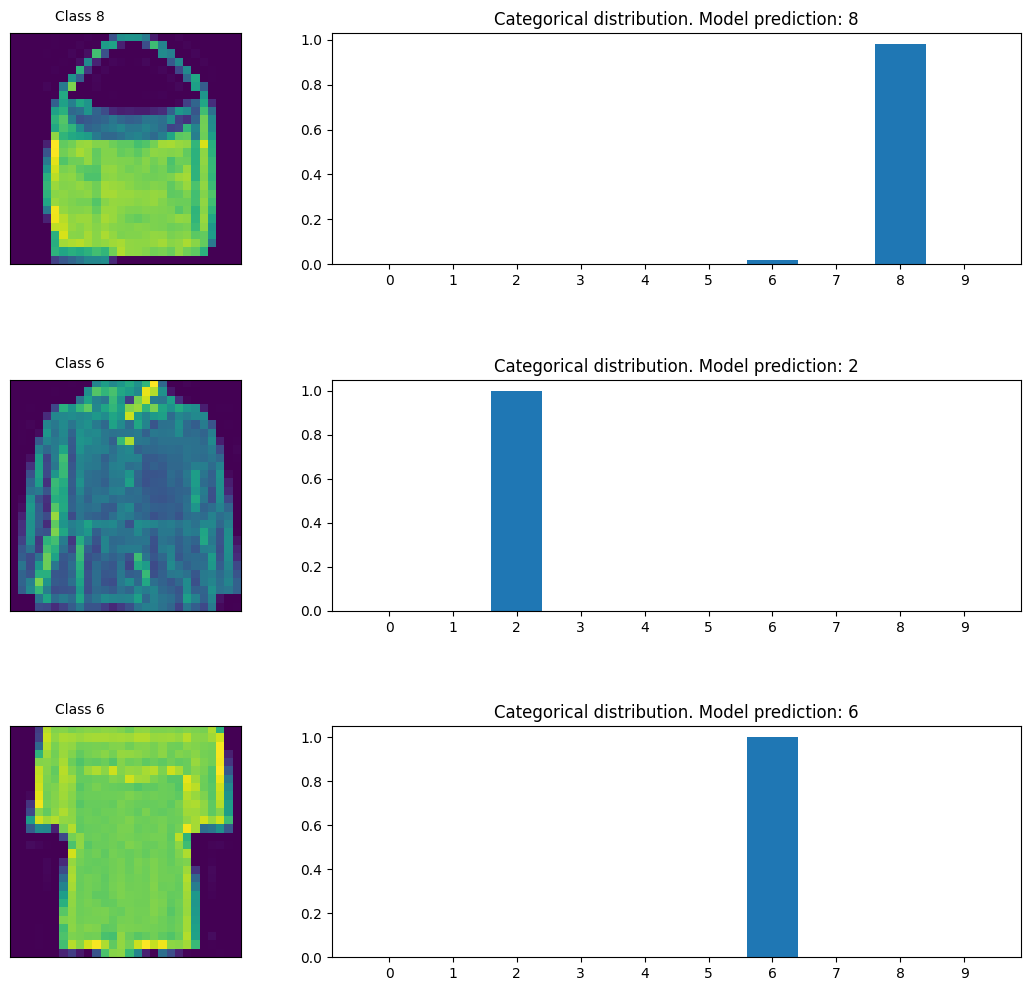

In [11]:
num_test_images = test_images.shape[0]

random_inx = [2852, 3198, 1236]
random_test_images = test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = resblock_model(random_test_images)

fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(5., -2., f'Class {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    pred_inx = np.argmax(prediction)
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {pred_inx}")
    
plt.show()
